In [1]:
from nltk.corpus import stopwords
import string
import numpy as np
import pandas as pd
import os
import time
import gc
import random
from keras.preprocessing import text, sequence
import torch
from torch import nn
from torch.utils import data
from torch.nn import functional as F
import torch.optim as optim


D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '

### Final

In [2]:
pos_tags_1=dict({'CC':[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'CD':[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'DT':[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'EX':[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'FW':[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'IN':[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'JJ':[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'JJR':[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'JJS':[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'LS':[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'MD':[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'NN':[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'NNS':[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'NNP':[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'NNPS':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'PDT':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'POS':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'PRP':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'PRP$':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'RB':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'RBR':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'RBS':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'RP':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
'SYM':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
'TO':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
'UH':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
'VB':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
'VBD':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
'VBG':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
'VBN':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
'VBP':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
'VBZ':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
'WDT':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
'WP':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
'WP$':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
'WRB':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]}
             )
pos_tags=dict({'0':[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'1':[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'2':[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'3':[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'4':[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'5':[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'6':[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'7':[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'8':[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'9':[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'10':[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'11':[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'12':[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'13':[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'14':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'15':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'16':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'17':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'18':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'19':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'20':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'21':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
'22':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
'23':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
'24':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
'25':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
'26':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
'27':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
'28':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
'29':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
'30':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
'31':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
'32':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
'33':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
'34':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
'35':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]}
             )
tags=['WRB','WP$','WP','WDT','VBZ','VBP','VBN','VBG','VBD','VB','UH','TO','SYM','RP','RBS','RBR','RB','PRP$','PRP','POS','PDT'
,'NNPS','NNP','NNS','NN','MD','LS','JJS','JJR','JJ','IN','FW','EX','DT','CD','CC']
# Reversing a list using reversed() 
def Reverse(lst): 
    return [ele for ele in reversed(lst)]
tags=Reverse(tags)
tag2idx = {t: i for i, t in enumerate(tags)}
tag2idx

{'CC': 0,
 'CD': 1,
 'DT': 2,
 'EX': 3,
 'FW': 4,
 'IN': 5,
 'JJ': 6,
 'JJR': 7,
 'JJS': 8,
 'LS': 9,
 'MD': 10,
 'NN': 11,
 'NNS': 12,
 'NNP': 13,
 'NNPS': 14,
 'PDT': 15,
 'POS': 16,
 'PRP': 17,
 'PRP$': 18,
 'RB': 19,
 'RBR': 20,
 'RBS': 21,
 'RP': 22,
 'SYM': 23,
 'TO': 24,
 'UH': 25,
 'VB': 26,
 'VBD': 27,
 'VBG': 28,
 'VBN': 29,
 'VBP': 30,
 'VBZ': 31,
 'WDT': 32,
 'WP': 33,
 'WP$': 34,
 'WRB': 35}

In [3]:
from string import punctuation
from os import listdir
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
import torch
import torch.nn as nn
 
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
 
# turn a doc into clean tokens
def clean_doc(doc, vocab):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # filter out tokens not in vocab
    tokens = [w for w in tokens if w in vocab]
    tokens = ' '.join(tokens)
    return tokens
 
# load all docs in a directory
def process_docs(directory, vocab, is_trian):
    documents = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_trian and filename.startswith('cv9'):
            continue
        if not is_trian and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load the doc
        doc = load_doc(path)
        # clean doc
        tokens = clean_doc(doc, vocab)
        # add to list
        documents.append(tokens)
    return documents
 
# load embedding as a dict
def load_embedding(filename):
    # load embedding into memory, skip first line
    file = open(filename, encoding="utf8")
    lines = file.readlines()
    file.close()
    # create a map of words to vectors
    embedding = dict()
    for line in lines:
        parts = line.split()
        # key is string word, value is numpy array for vector
        embedding[parts[0]] = asarray(parts[1:], dtype='float32')
    return embedding
 
# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, 100))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        vector = embedding.get(word)
        if vector is not None:
            weight_matrix[i] = vector
    return weight_matrix
 
def get_weight(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = 37
    # define weight matrix dimensions with all 0
    weight_matrix_1 = np.zeros((vocab_size, 36))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        vector = embedding.get(word)
        if vector is not None:
            weight_matrix_1[i] = vector
    return weight_matrix_1
# load the vocabulary
vocab_filename = 'Movie_review/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
 
# load all training reviews
positive_docs = process_docs('Movie_review/txt_sentoken/pos', vocab, True)
negative_docs = process_docs('Movie_review/txt_sentoken/neg', vocab, True)
train_docs = negative_docs + positive_docs
 
# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_docs)
 
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)
# pad sequences
max_length = max([len(s.split()) for s in train_docs])

In [ ]:
import stanfordnlp
stanfordnlp.download('en')

In [4]:
from stanfordcorenlp import StanfordCoreNLP as scn
nlp = scn(r'stanford_parser\stanford-corenlp-full-2018-10-05/')

In [5]:
def convert(sentence):
    t=nlp.pos_tag(sentence)
    list1=[]
    for i in t:
        tag=i[1]
        list1.append(tag)

In [6]:
y = [[tag2idx[w[1]] for w in nlp.pos_tag(sentence)] for sentence in train_docs]

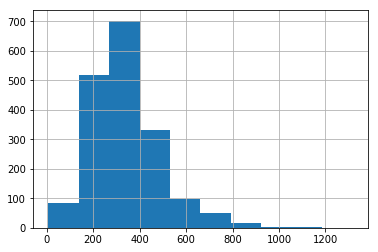

count    1800.000000
mean      340.327222
std       147.835862
min         7.000000
25%       240.000000
50%       320.500000
75%       413.000000
max      1317.000000
dtype: float64

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in encoded_docs]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [8]:
Xtrain = pad_sequences(encoded_docs, maxlen=400, padding='post',truncating='post',value=0)
Xtrain_1=pad_sequences(y, maxlen=400, padding='post',truncating='post',value=0)
# define training labels
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])
 
# load all test reviews
positive_docs = process_docs('Movie_review/txt_sentoken/pos', vocab, False)
negative_docs = process_docs('Movie_review/txt_sentoken/neg', vocab, False)
test_docs = negative_docs + positive_docs
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(test_docs)
y_1 = [[tag2idx[w[1]] for w in nlp.pos_tag(sentence)] for sentence in test_docs]
# pad sequences
Xtest = pad_sequences(encoded_docs, maxlen=400, padding='post',truncating='post',value=0)
Xtest_1=pad_sequences(y_1, maxlen=400, padding='post',truncating='post',value=0)
# define test labels
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])
 
# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1
 
# load embedding from file
raw_embedding = load_embedding('glove.6B.100d.txt')
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)
embedding_pos=get_weight(pos_tags_1,tag2idx)# create the embedding layer
#embedding_layer = Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable=False)
embedding_pos

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
embedding_vectors

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.19915999, -0.049702  ,  0.24579   , ..., -0.068109  ,
         0.017651  ,  0.06455   ],
       [-0.22556999,  0.49417999,  0.48609999, ..., -0.45743999,
         0.49645999,  0.34906   ],
       ...,
       [-0.048561  ,  0.23923001,  0.57498002, ..., -0.0028215 ,
         0.44571999,  0.34439999],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [10]:
weight_matrix=torch.from_numpy(embedding_vectors)
weight_matrix_1=torch.from_numpy(embedding_pos)

In [11]:
def create_emb_layer(weights_matrix, non_trainable=False):
    num_embeddings=25768
    embedding_dim= 100
    emb_layer = nn.Embedding(num_embeddings, embedding_dim)
    emb_layer.load_state_dict({'weight': weights_matrix})
    if non_trainable:
        emb_layer.weight.requires_grad = False

    return emb_layer, num_embeddings, embedding_dim

In [12]:
def create_emb_layer_pos(weights_matrix_1, non_trainable=False):
    num_embeddings_pos=37
    embedding_dim_pos= 36
    emb_layer_pos = nn.Embedding(num_embeddings_pos, embedding_dim_pos)
    emb_layer_pos.load_state_dict({'weight': weights_matrix_1})
    if non_trainable:
        emb_layer_pos.weight.requires_grad = False

    return emb_layer_pos, num_embeddings_pos, embedding_dim_pos

### Model

In [13]:
class LSTM(nn.Module):
    def __init__(self, weight_matrix,weight_matrix_1, hidden_size, num_layers):
        super(LSTM,self).__init__()
        self.embedding, self.num_embeddings, self.embedding_dim = create_emb_layer(weight_matrix, True)
        self.embedding_pos, self.num_embeddings_pos, self.embedding_dim_pos = create_emb_layer_pos(weight_matrix_1, True)
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size=136, hidden_size=512, num_layers=1, batch_first=True)
        self.fc = nn.Linear(in_features=512, out_features=1)
        self.sigm = nn.Sigmoid()
       
    def forward(self, inp,inp_1, hidden):
        embeds_out = self.embedding(inp)
        embeds_out_1=self.embedding_pos(inp_1)
        out_1=torch.cat((embeds_out,embeds_out_1),2)
        lstm_out, h = self.lstm(out_1, hidden)
        fc_out = self.fc(lstm_out.contiguous().view(-1, 512))
        sigm_out = self.sigm(fc_out)
        output=sigm_out
        #output = sigm_out.view(30, -1)
        #output=output[:,-1]
        return output
    
    def init_hidden(self):
        return None
    
lstm_model = LSTM(weight_matrix,weight_matrix_1, 512, 1)

### Data Loading

In [14]:
import torch
from torch.utils.data import DataLoader, TensorDataset
random.seed(1)
torch.manual_seed(1)
np.random.seed(1)
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(Xtrain), torch.from_numpy(ytrain))
test_data = TensorDataset(torch.from_numpy(Xtest), torch.from_numpy(ytest))
train_data_1 = TensorDataset(torch.from_numpy(Xtrain_1), torch.from_numpy(ytrain))
test_data_1 = TensorDataset(torch.from_numpy(Xtest_1), torch.from_numpy(ytest))
# dataloaders
batch_size = 20
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)
train_loader_1 = DataLoader(train_data_1, shuffle=True, batch_size=batch_size)
test_loader_1 = DataLoader(test_data_1, shuffle=True, batch_size=batch_size)

### Training

In [15]:
import torch.optim as optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(lstm_model.parameters(), lr=0.005)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(zip(train_loader,train_loader_1), 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs=data[0][0]
        labels = data[0][1]
        inputs_1=data[1][0]
        labels_1=data[1][1]
        hidden = lstm_model.init_hidden()
        # zero the parameter gradients
        optimizer.zero_grad()
        lstm_model.zero_grad()
        inputs = inputs.type(torch.LongTensor)
        labels=labels.type(torch.LongTensor)
        inputs_1 = inputs_1.type(torch.LongTensor)
        output=lstm_model(inputs,inputs_1,hidden)
        output = output.view(20, -1)
        # forward + backward + optimize
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()


        # print statistics
        running_loss += loss.item()
        if i % 5 == 4:    # print every 5 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss))
            running_loss = 0.0

print('Finished Training')

[1,     5] loss: -2.573
[1,    10] loss: -2.592
[1,    15] loss: -2.610
[1,    20] loss: -2.618
[1,    25] loss: -2.623
[1,    30] loss: -2.635
[1,    35] loss: -2.653
[1,    40] loss: -2.664
[1,    45] loss: -2.680
[1,    50] loss: -2.683
[1,    55] loss: -2.699
[1,    60] loss: -2.713
[1,    65] loss: -2.721
[1,    70] loss: -2.741
[1,    75] loss: -2.746
[1,    80] loss: -2.761
[1,    85] loss: -2.768
[1,    90] loss: -2.784
[2,     5] loss: -2.793
[2,    10] loss: -2.802
[2,    15] loss: -2.810
[2,    20] loss: -2.827
[2,    25] loss: -2.850
[2,    30] loss: -2.855
[2,    35] loss: -2.872
[2,    40] loss: -2.890
[2,    45] loss: -2.889
[2,    50] loss: -2.904
[2,    55] loss: -2.901
[2,    60] loss: -2.946
[2,    65] loss: -2.936
[2,    70] loss: -2.955
[2,    75] loss: -2.951
[2,    80] loss: -2.976
[2,    85] loss: -2.985
[2,    90] loss: -3.004
Finished Training


### Prediction

In [24]:
correct = 0
total = 0
with torch.no_grad():
    for data in zip(test_loader,test_loader_1):
        inputs=data[0][0]
        labels = data[0][1]
        inputs_1=data[1][0]
        labels_1=data[1][1]
        hidden = lstm_model.init_hidden()
        inputs = inputs.type(torch.LongTensor)
        inputs_1 = inputs_1.type(torch.LongTensor)
        labels=labels.type(torch.LongTensor)
        output = lstm_model(inputs,inputs_1,hidden)
        output = output.view(20, -1)
        output=output[:,-1]
        #print(output)
        #print(output.shape)
        for i,j in enumerate(output):
            if j>0.5745:
                predicted=1
            else:
                predicted=0
            total += 1
            if(predicted==labels[i]):
                correct += 1

print('Accuracy of the network on the test set: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test set: 54 %
